# Logistic Regression 

Welcome to the first classification programming assignment. You will now implement all that you have learnt about logistic regression and classification in this notebook. __Make sure to watch the short video with a few notes on the notebook before starting this exersize__, and good luck!


*Use ctrl + on windows, or cmd + on mac to make the code bigger, and relpace the + with a - to make the code smaller*

*Press __shift + enter__ to run a code block*

## Packages ##

In this first __cell__ you will import some packages that will be useful during the programming assignment

+ __Numpy__ is used a lot for mathematical operations in python, and is especially helpful with matrices and vectors

+ __Matplotlib__ is usedd for plotting graphs and showing vizualized data

+ __PIL__ is used for image processing

+ __Pandas__ is really helpful for reading and manipulating data (for example from .csv files)

+ __os__ is just your operating system

+ __glob__ is used for pathnames (ie file directories)

+ __sklearn__ is a free software machine learning library for Python



In [78]:
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import pandas as pd

import os

from glob import glob

from sklearn.model_selection import train_test_split

import keras

from keras.preprocessing import image


#setting a seed so that all the results will remain constant
np.random.seed(3)

#This just makes sure that the plots are shown in the Jupyter notebook
%matplotlib inline

## Data handling ##

Once you understandd how to create ML applications this is the part that usually takes the longest, but I will just explain what is happening here, and there is nothing in this part that you will need to do.

I have commented in some code boxes that you can change some things to see different things, but do not change anything not specified

Below is where the labels are loaded in, and so is the training and test images. The images are then converted into flattenedd vectors ready to be processed

In [2]:
#Opening a .csv file full of labels for the data you are going to train on

labels_temp = pd.read_csv('data/labels.csv')

#showing the top of the data to make sure it has loaded properly

labels_temp.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [3]:
#converting the labels into a numpy array and printing its shape

labels = np.array(labels_temp)

labels = labels.T

print(labels.shape)

(1, 308)


(64, 64, 3)
RGB
(64, 64)


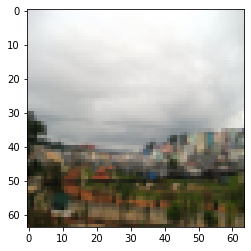

In [49]:
'''

You can go and change the image or image2 directories and try and see what other images are in the
training data. Just a note - the dog images do not go from 0 to m, they are random numbers so you will
have to go to the actual file you downloaded to see what the other filenames are.

'''


#loading the image
im = Image.open('data/dog images/11.png')
im2 = Image.open('data/false images/12false.png')

#converting into numpy array
data = np.array(image)

print(data.shape)

# summarize image details
print(im2.mode)
print(im2.size)


''' change image2 to image below if you want to see that'''
plt.imshow(im2)
plt.show()



### Loading the images ###

Below is where I load in all the images from the files. __You will have to enter your directories in place of mine, the same way I have done it__. I have marked with comments where you will have to change something

In [50]:
''' CODE BELOW '''
PATH = os.path.abspath(os.path.join('D:/Downloads/Teens In AI/TeensInAI2020/Dog Logistic Regression', 'data'))
''' CODE ABOVE '''

#You can leave this line as it is, it is just going to the dog images file (ie the file with labels 1)
SOURCE_IMAGES = os.path.join(PATH, "dog images")

# Just adding a .png to the end of the images to make sure they are the correct file type
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Size of data
NUM_IMAGES = len(images)
HEIGHT = 64
WIDTH = 64
CHANNELS = 3
SHAPE = (HEIGHT, WIDTH, CHANNELS)

#checking if algorithm is working
print("This means the algorithm is working so far. Number of images = " + str(NUM_IMAGES))


for i,img in enumerate(images):
    #'''enumerate takes all objects and lays them out 1 by 1 to loop through'''

    #'''opening the image'''
    imageTemp = Image.open(img)
    
    #'''converting from an image into a multi dimensional array dimensions - (height,width,channels)'''
    image = np.asarray(imageTemp)

    #'''reshaping the array into a (1,h*w*c) shaped matrix'''
    image0 = image.reshape((1,HEIGHT*WIDTH*CHANNELS))

    #'''below is stacking the row vectors on top of each other to make a (m,h*w*c) matrix'''
    #'''where m is the number of images'''
    
    if i != 0:
        imageFinalArray = np.vstack((imageFinalArray, image0))
    else:
        imageFinalArray = image0
    
    #print(imageFinalArray.shape)

#'''-------------------------------------------------------------------------------------------------------------'''

#'''the bit above was for dog images, bit below is for non dog images'''

#'''-------------------------------------------------------------------------------------------------------------'''

#this is the path to the non dog images
SOURCE_IMAGES = os.path.join(PATH, "false images")

images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

#below is basically the same thing as above, but for the non dog images
for i,img in enumerate(images):

    imageTemp = Image.open(img)

    image = np.asarray(imageTemp)

    image0 = image.reshape((1,HEIGHT*WIDTH*CHANNELS))

    imageFinalArray = np.vstack((imageFinalArray, image0))

    
# printing the final input array's shape

print()
print("Final input array's shape before transposing : " + str(imageFinalArray.shape))
print()
print("Final input array's shape : ")

'''transposing the array (swapping the dimensions), changing name to train input dataset'''
'''dividing by 255 to normalize dataset (all values will be between 0 & 1)'''
train_x = imageFinalArray.T
print(train_x.shape)
#print(train_x)

This means the algorithm is working so far. Number of images = 154

Final input array's shape before transposing : (308, 12288)

Final input array's shape : 
(12288, 308)


In [51]:
#Shuffling the data and the labels. You can uncomment the prints to see the shapes of the different varirables - which I think is really helpful to understand

from sklearn.utils import shuffle
x2 = train_x.T
labels2 = labels.T

#print(labels2.shape)
#print(x2.shape)

x_shuffled, y_shuffled = shuffle(x2, labels2, random_state=3)

print(x_shuffled.shape)
print(y_shuffled.shape)
print(y_shuffled[1])


(308, 12288)
(308, 1)
[0]


label = [1], image index = 42


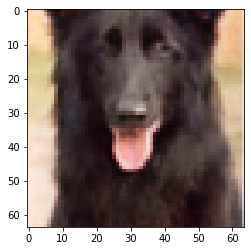

In [52]:
#here you can change the index to see different images in the TRAINING SET
x_shuffledTESTING = x_shuffled.T
y_shuffledTESTING = y_shuffled.T

imgSize = 64

'''CODE BELOW'''
#index has to be between 0 and 307 because that is the number of images that are in the file
index = 42
'''CODE ABOVE'''
plt.imshow(x_shuffledTESTING[:,index].reshape((imgSize, imgSize, 3)))

print("label = " + str(y_shuffledTESTING[:,index]) + ", image index = " + str(index))

In [53]:
#this is just an example showing how the shuffle function works, and shuffels the labels and the data

a = [ [[1,1],[10,10]] ,[[2,2],[20,20]] , [[3,3],[30,30]] ]
b = [1,2,3]  

a2, b2 = shuffle(a, b, random_state=3)

print(a2)
print(b2)


[[[2, 2], [20, 20]], [[1, 1], [10, 10]], [[3, 3], [30, 30]]]
[2, 1, 3]


In [54]:
#Below is splitting the data and labels into train and test sets

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(x_shuffled, y_shuffled, test_size=0.1, random_state = 3)

#printing the shapes of the train and test sets
print(X_train_temp.shape, X_test_temp.shape, y_train_temp.shape, y_test_temp.shape)

#storing the size of the train and test set
m_train = X_train_temp.shape[0]
m_test = X_test_temp.shape[0]

(277, 12288) (31, 12288) (277, 1) (31, 1)


In [55]:
#Normalizing data
train_set_x = X_train_temp.T/255.
test_set_x = X_test_temp.T/255.

#Transposing to get the correct shape
train_set_y = y_train_temp.T
test_set_y = y_test_temp.T

#printing the different shapes
print("Shape of the train set : " + str(train_set_x.shape))
print("Shape of the test set : " + str(test_set_x.shape))
print("Shape of the train labels : " + str(train_set_y.shape))
print("Shape of the test labels : " + str(test_set_y.shape))

Shape of the train set : (12288, 277)
Shape of the test set : (12288, 31)
Shape of the train labels : (1, 277)
Shape of the test labels : (1, 31)


## Sigmoid function##

You will now make the sigmoid function which will compute the sigmoid of z:

`Arguments:`

`z -- A scalar or numpy array of any size.`

`Return:`

`s -- sigmoid(z)`


___Using the notes you have made, fill in the code below___

*Hint:*

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

Use `np.exp()`

In [56]:
def sigmoid(z):

    ### CODE BELOW
    
    return 1 / (1 + np.exp(-z))
    
    ### CODE ABOVE


In [57]:
print ("sigmoid([-4, 9]) = " + str(sigmoid(np.array([-4,9]))))

sigmoid([-4, 9]) = [0.01798621 0.99987661]


**Expected Output**: 

sigmoid([-4, 9]) = [0.01798621 0.99987661]

## Initializing parameters

In the code block below you will initialize the parameters (the weights and biases). You will *initialize the weights randomly, but __multiply the weights by 0.01__*. The bias can simply be initialized to zero


`Arguments:`

`dim -- size of the weight vector`

`Return:`

`w -- initialized vector of shape (dim, 1)`

`b -- initialized scalar (corresponds to the bias)`


___Using the notes you have made, fill in the code below___

*Hint:*

Use `np.random.randn()`, look up its documentation online.

*Hint 2:*

It takes the dimensions as arguments



In [58]:
def initialize_random(dim):

    np.random.seed(3)
    
    ### CODE BELOW
    
    w = np.zeros((dim, 1))
    
    b = 0
    
    ### CODE ABOVE

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [59]:
dim = 3
w, b = initialize_random(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0


**Expected Output**: 

w = [[0.01788628]
 [0.0043651 ]
 [0.00096497]]
 
b = 0



## Computing predictions, cost, and derivatives

In the code block below you will compute A, the cost, "dw" and "db". *For this part you will need to refer to any notes you have made, or to the video about the vectorized implementation of logistic regression*. This will set up the parameters ready for gradient descent


`Arguments:`

`w -- weights, a vector (num_px * num_px * 3, 1)`

`b -- bias, a scalar`

`X -- data, a matrix (num_px * num_px * 3, number of examples)`

`Y -- label, vector (1, number of examples)`

`Return:`

`cost -- negative log-likelihood cost for logistic regression`

`dw -- gradient of the cost with respect to w`

`db -- gradient of the cost with respect to b`


___Using the notes you have made, fill in the code below___

*Hint:*

Look at vectorized implementation video

*Hint 2:*

Use `np.log()` for logs,  `np.dot()` for matrix multiplication (NOT element-wise multiplication), `np.sum()` for summations, `*` for element-wise multiplications, and the `sigmoid()` function you implemented for the sigmoid function




In [60]:
def compute_grads_and_cost(w, b, X, Y):
    
    
    #number of examples in input
    m = X.shape[1]
    

    # calculating prediction and cost
    
    ### CODE BELOW
    
    #calculating the prediction
    
    Z = None
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    # compute cost DONT FORGET np.sum()
    cost = -1./m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    
    # calculating derivatives

    
    #calculating (dcost/dw) = "dw"
    dw = 1./m*np.dot(X, (A-Y).T)
    
    #calculating (dcost/db) = "db"
    db = 1./m*np.sum(A-Y)
    
    ### CODE ABOVE

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    gradients = {"dw": dw,
                 "db": db}
    
    return gradients, cost

In [61]:
w, b, X, Y = np.array([[1],[1]]), 1, np.array([[3,-3,3],[3,-3,-3.3]]), np.array([[1,0,0]])
gradients, cost = compute_grads_and_cost(w, b, X, Y)
print ("dw = " + str(gradients["dw"]))
print ("db = " + str(gradients["db"]))
print ("cost = " + str(cost))

dw = [[ 0.66058387]
 [-0.74261045]]
db = 0.2246565239660168
cost = 0.3702709546094501


**Expected Output**:

dw = [[ 0.66058387][-0.74261045]]

db = 0.2246565239660168

cost = 0.3702709546094501

## Training the algorithm

In this next function you will implement one step of gradient descent in order to make your algorithm learn, this will be called multiple times in a for loop in order to train the algorithm multiple times.

`Arguments:`

`w -- weights, a vector (num_px * num_px * 3, 1)`

`b -- bias, a scalar`

`X -- data, a matrix (num_px * num_px * 3, number of examples)`

`Y -- label, vector (1, number of examples)`

`num_iterations -- number of steps of gradient descent being implemented`

`learning_rate -- the learning rate (alpha)`

`Return:`

`parameters -- dictionary containing the weights w and bias b`

`gradients -- dictionary containing the gradients of the weights and bias`

`costs -- list of all the costs computed during the optimization`



___Using the notes you have made, fill in the code below___

*Hint:*

Use previous functions you have made to calculate the costs and gradients and use gradient descent to update the weights and biases

*Hint 2:*

parameter = parameter - alpha * dparameter

In [62]:
def train(w, b, X, Y, num_iterations, learning_rate):

    costs = []
    
    for i in range(num_iterations):
        
        ### CODE BELOW
        gradients, cost = compute_grads_and_cost(w, b, X, Y)
        ### CODE ABOVE
        
        # getting gradients that were computed
        dw = gradients["dw"]
        db = gradients["db"]
        
        # updadting the parameters
        
        ### CODE BELOW
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### CODE ABOVE
        
        # Recording and printing the costs every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"w": w,
              "b": b}
    
    gradents = {"dw": dw,
             "db": db}
    
    return parameters, gradients, costs

In [63]:
parameters, gradients, costs = train(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)

print ("w = " + str(parameters["w"]))
print ("b = " + str(parameters["b"]))
print ("dw = " + str(gradients["dw"]))
print ("db = " + str(gradients["db"]))

Cost after iteration 0: 0.370271
w = [[0.68711295]
 [1.35688941]]
b = 0.8922086958234813
dw = [[ 0.1743475 ]
 [-0.20473946]]
db = 0.06163622737541586


**Expected Output**: 

Cost after iteration 0: 5.801545

w = [[0.19033591][0.12259159]]

b = 1.9253598300845747

dw = [[0.67752042][1.41625495]]

db = 0.21919450454067657



## Training the algorithm

Now that you have implemented code to 'learn' w and b, you can use the parameters to predict the (hopefully) correct labels for a dataset (of images)

`Arguments:`

`w -- weights, a vector (num_px * num_px * 3, 1)`

`b -- bias, a scalar`

`X -- data, a matrix (num_px * num_px * 3, number of examples)`

`Return:`

` Y_prediction -- a vector containing all predictions (0 or 1) for the examples in X`



___Using the notes you have made, fill in the code below___

*Hint:*

Use if statements to go from values between 1 and 0 to 1 or 0. Remember the prediction is equal to 1 if A >= 0.5
--update this is done for you, because many people found this confusing

In [64]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # compute the raw prediction value
    
    ### CODE BELOW
    A = sigmoid(np.dot(w.T, X) + b)
    ### CODE ABOVE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities ( A[0,i] ) to actual predictions ( p[0,i] )
        
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        elif A[0,i] < 0.5:
            Y_prediction[0,i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [65]:
w = np.array([[0.333],[0.667]])
b = 1
X = np.array([[1.,-1,-3,7],[1,-7,0,-5]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 0. 1. 0.]]


**Expected Output**: 


predictions = [[1. 0. 1. 0.]]

## Putting everything together

Now you will put everything together (in the correct order into a final model

`Arguments:`

`X_train -- training set, a matrix (num_px * num_px * 3, m_train)`

`Y_train -- training labels, a row vector (1, m_train)`

`X_test -- test set, a matrix (num_px * num_px * 3, m_test)`

`Y_test -- test labels, a row vector (1, m_test)`

`num_iterations -- number of steps of gradient descent being implemented`

`learning_rate -- the learning rate (alpha)`

`Return:`

`d -- dictionary containing information about the model`



___Using the notes you have made, fill in the code below___

*Hint:*

Put everything in order, as stated with comments

In [66]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):

    ### CODE BELOW
    
    # initialize parameters with zeros
    w, b = initialize_random(X_train.shape[0])
    #has to be the same as the down length of matrix X ie X_train.shape[0]

    # Gradient descent
    parameters, gradients, costs = train(w, b, X_train, Y_train, num_iterations, learning_rate)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    
    ### CODE ABOVE
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.578165
Cost after iteration 200: 0.442768


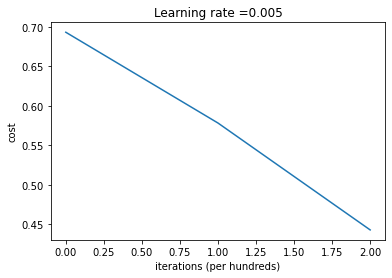

train accuracy: 88.8086642599278 %
test accuracy: 48.38709677419355 %


In [67]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 300, learning_rate = 0.005)

## Training the model I

As you can see the accuracy was around 81% on the train set, but the accuracy on the test set was much lower (~71%). This is because of the hyperparameter selection. If you take bigger gradient descent steps (ie a higher learning rate, theoretically the algorithm should get a lower cost quicker, so let's try that.

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.162515
Cost after iteration 200: 0.880457


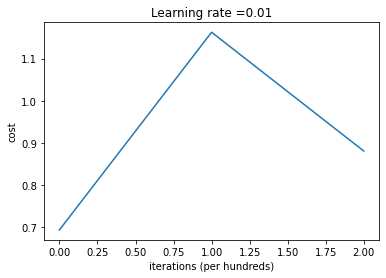

train accuracy: 72.56317689530685 %
test accuracy: 41.93548387096774 %


In [68]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 300, learning_rate = 0.01)

## Training the model II

That wasn't good. Basically what happened here is that the steps were too big, and so the algorithm, instead of converging, actually chose more and more 'wrong' hyperparameters. Right now the algorithm is as good as guessing. Now let's try increasing the number of iterations instead of the learning rate

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.578165
Cost after iteration 200: 0.442768
Cost after iteration 300: 0.355540
Cost after iteration 400: 0.318455
Cost after iteration 500: 0.291240
Cost after iteration 600: 0.268607
Cost after iteration 700: 0.249411
Cost after iteration 800: 0.232887
Cost after iteration 900: 0.218487
Cost after iteration 1000: 0.205813
Cost after iteration 1100: 0.194561
Cost after iteration 1200: 0.184497
Cost after iteration 1300: 0.175437
Cost after iteration 1400: 0.167234


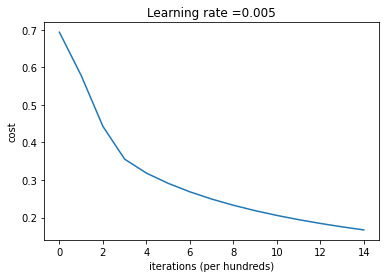

train accuracy: 98.55595667870035 %
test accuracy: 54.83870967741936 %


In [69]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = 0.005)

## Training the model III

Now that is looking much better! You can see the cost starts going down less and less and as you can see it is approaching the global minimum. Now I want you to try some hyperparameters, and if your hyperparameters do better than the model above, you can get a free virtual high five!(I did not spend a long time tuning it so I'm sure you can get better models easily)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.690374
Cost after iteration 200: 0.687720
Cost after iteration 300: 0.685149
Cost after iteration 400: 0.682646
Cost after iteration 500: 0.680207
Cost after iteration 600: 0.677828
Cost after iteration 700: 0.675507
Cost after iteration 800: 0.673243
Cost after iteration 900: 0.671034
Cost after iteration 1000: 0.668878
Cost after iteration 1100: 0.666773
Cost after iteration 1200: 0.664717
Cost after iteration 1300: 0.662710
Cost after iteration 1400: 0.660750
Cost after iteration 1500: 0.658835
Cost after iteration 1600: 0.656963
Cost after iteration 1700: 0.655135
Cost after iteration 1800: 0.653347
Cost after iteration 1900: 0.651599
Cost after iteration 2000: 0.649890
Cost after iteration 2100: 0.648219
Cost after iteration 2200: 0.646583
Cost after iteration 2300: 0.644983
Cost after iteration 2400: 0.643417
Cost after iteration 2500: 0.641885
Cost after iteration 2600: 0.640384
Cost after iteration 2700: 0.638914
Cost

Cost after iteration 22500: 0.530280
Cost after iteration 22600: 0.529992
Cost after iteration 22700: 0.529704
Cost after iteration 22800: 0.529418
Cost after iteration 22900: 0.529132
Cost after iteration 23000: 0.528846
Cost after iteration 23100: 0.528562
Cost after iteration 23200: 0.528278
Cost after iteration 23300: 0.527995
Cost after iteration 23400: 0.527713
Cost after iteration 23500: 0.527431
Cost after iteration 23600: 0.527151
Cost after iteration 23700: 0.526871
Cost after iteration 23800: 0.526592
Cost after iteration 23900: 0.526313
Cost after iteration 24000: 0.526035
Cost after iteration 24100: 0.525758
Cost after iteration 24200: 0.525482
Cost after iteration 24300: 0.525206
Cost after iteration 24400: 0.524931
Cost after iteration 24500: 0.524657
Cost after iteration 24600: 0.524384
Cost after iteration 24700: 0.524111
Cost after iteration 24800: 0.523839
Cost after iteration 24900: 0.523567
Cost after iteration 25000: 0.523296
Cost after iteration 25100: 0.523026
C

Cost after iteration 44700: 0.479271
Cost after iteration 44800: 0.479082
Cost after iteration 44900: 0.478894
Cost after iteration 45000: 0.478706
Cost after iteration 45100: 0.478518
Cost after iteration 45200: 0.478331
Cost after iteration 45300: 0.478144
Cost after iteration 45400: 0.477957
Cost after iteration 45500: 0.477770
Cost after iteration 45600: 0.477584
Cost after iteration 45700: 0.477398
Cost after iteration 45800: 0.477212
Cost after iteration 45900: 0.477027
Cost after iteration 46000: 0.476841
Cost after iteration 46100: 0.476656
Cost after iteration 46200: 0.476472
Cost after iteration 46300: 0.476287
Cost after iteration 46400: 0.476103
Cost after iteration 46500: 0.475919
Cost after iteration 46600: 0.475735
Cost after iteration 46700: 0.475552
Cost after iteration 46800: 0.475369
Cost after iteration 46900: 0.475186
Cost after iteration 47000: 0.475003
Cost after iteration 47100: 0.474821
Cost after iteration 47200: 0.474638
Cost after iteration 47300: 0.474456
C

Cost after iteration 66900: 0.442841
Cost after iteration 67000: 0.442697
Cost after iteration 67100: 0.442553
Cost after iteration 67200: 0.442410
Cost after iteration 67300: 0.442266
Cost after iteration 67400: 0.442123
Cost after iteration 67500: 0.441980
Cost after iteration 67600: 0.441836
Cost after iteration 67700: 0.441694
Cost after iteration 67800: 0.441551
Cost after iteration 67900: 0.441408
Cost after iteration 68000: 0.441266
Cost after iteration 68100: 0.441123
Cost after iteration 68200: 0.440981
Cost after iteration 68300: 0.440839
Cost after iteration 68400: 0.440697
Cost after iteration 68500: 0.440556
Cost after iteration 68600: 0.440414
Cost after iteration 68700: 0.440272
Cost after iteration 68800: 0.440131
Cost after iteration 68900: 0.439990
Cost after iteration 69000: 0.439849
Cost after iteration 69100: 0.439708
Cost after iteration 69200: 0.439567
Cost after iteration 69300: 0.439427
Cost after iteration 69400: 0.439286
Cost after iteration 69500: 0.439146
C

Cost after iteration 89100: 0.414032
Cost after iteration 89200: 0.413915
Cost after iteration 89300: 0.413798
Cost after iteration 89400: 0.413680
Cost after iteration 89500: 0.413563
Cost after iteration 89600: 0.413446
Cost after iteration 89700: 0.413329
Cost after iteration 89800: 0.413213
Cost after iteration 89900: 0.413096
Cost after iteration 90000: 0.412979
Cost after iteration 90100: 0.412863
Cost after iteration 90200: 0.412746
Cost after iteration 90300: 0.412630
Cost after iteration 90400: 0.412513
Cost after iteration 90500: 0.412397
Cost after iteration 90600: 0.412281
Cost after iteration 90700: 0.412165
Cost after iteration 90800: 0.412049
Cost after iteration 90900: 0.411934
Cost after iteration 91000: 0.411818
Cost after iteration 91100: 0.411702
Cost after iteration 91200: 0.411587
Cost after iteration 91300: 0.411471
Cost after iteration 91400: 0.411356
Cost after iteration 91500: 0.411241
Cost after iteration 91600: 0.411126
Cost after iteration 91700: 0.411011
C

Cost after iteration 111000: 0.390361
Cost after iteration 111100: 0.390261
Cost after iteration 111200: 0.390162
Cost after iteration 111300: 0.390062
Cost after iteration 111400: 0.389963
Cost after iteration 111500: 0.389863
Cost after iteration 111600: 0.389764
Cost after iteration 111700: 0.389665
Cost after iteration 111800: 0.389565
Cost after iteration 111900: 0.389466
Cost after iteration 112000: 0.389367
Cost after iteration 112100: 0.389268
Cost after iteration 112200: 0.389169
Cost after iteration 112300: 0.389070
Cost after iteration 112400: 0.388971
Cost after iteration 112500: 0.388873
Cost after iteration 112600: 0.388774
Cost after iteration 112700: 0.388675
Cost after iteration 112800: 0.388577
Cost after iteration 112900: 0.388478
Cost after iteration 113000: 0.388380
Cost after iteration 113100: 0.388282
Cost after iteration 113200: 0.388183
Cost after iteration 113300: 0.388085
Cost after iteration 113400: 0.387987
Cost after iteration 113500: 0.387889
Cost after i

Cost after iteration 132600: 0.370268
Cost after iteration 132700: 0.370181
Cost after iteration 132800: 0.370094
Cost after iteration 132900: 0.370007
Cost after iteration 133000: 0.369921
Cost after iteration 133100: 0.369834
Cost after iteration 133200: 0.369747
Cost after iteration 133300: 0.369661
Cost after iteration 133400: 0.369574
Cost after iteration 133500: 0.369488
Cost after iteration 133600: 0.369401
Cost after iteration 133700: 0.369315
Cost after iteration 133800: 0.369229
Cost after iteration 133900: 0.369142
Cost after iteration 134000: 0.369056
Cost after iteration 134100: 0.368970
Cost after iteration 134200: 0.368884
Cost after iteration 134300: 0.368798
Cost after iteration 134400: 0.368712
Cost after iteration 134500: 0.368626
Cost after iteration 134600: 0.368540
Cost after iteration 134700: 0.368454
Cost after iteration 134800: 0.368368
Cost after iteration 134900: 0.368283
Cost after iteration 135000: 0.368197
Cost after iteration 135100: 0.368111
Cost after i

Cost after iteration 154200: 0.352608
Cost after iteration 154300: 0.352531
Cost after iteration 154400: 0.352454
Cost after iteration 154500: 0.352377
Cost after iteration 154600: 0.352300
Cost after iteration 154700: 0.352224
Cost after iteration 154800: 0.352147
Cost after iteration 154900: 0.352070
Cost after iteration 155000: 0.351993
Cost after iteration 155100: 0.351917
Cost after iteration 155200: 0.351840
Cost after iteration 155300: 0.351764
Cost after iteration 155400: 0.351687
Cost after iteration 155500: 0.351611
Cost after iteration 155600: 0.351534
Cost after iteration 155700: 0.351458
Cost after iteration 155800: 0.351381
Cost after iteration 155900: 0.351305
Cost after iteration 156000: 0.351229
Cost after iteration 156100: 0.351152
Cost after iteration 156200: 0.351076
Cost after iteration 156300: 0.351000
Cost after iteration 156400: 0.350924
Cost after iteration 156500: 0.350848
Cost after iteration 156600: 0.350772
Cost after iteration 156700: 0.350696
Cost after i

Cost after iteration 175800: 0.336865
Cost after iteration 175900: 0.336796
Cost after iteration 176000: 0.336727
Cost after iteration 176100: 0.336658
Cost after iteration 176200: 0.336589
Cost after iteration 176300: 0.336520
Cost after iteration 176400: 0.336451
Cost after iteration 176500: 0.336382
Cost after iteration 176600: 0.336314
Cost after iteration 176700: 0.336245
Cost after iteration 176800: 0.336176
Cost after iteration 176900: 0.336107
Cost after iteration 177000: 0.336039
Cost after iteration 177100: 0.335970
Cost after iteration 177200: 0.335902
Cost after iteration 177300: 0.335833
Cost after iteration 177400: 0.335764
Cost after iteration 177500: 0.335696
Cost after iteration 177600: 0.335627
Cost after iteration 177700: 0.335559
Cost after iteration 177800: 0.335491
Cost after iteration 177900: 0.335422
Cost after iteration 178000: 0.335354
Cost after iteration 178100: 0.335286
Cost after iteration 178200: 0.335217
Cost after iteration 178300: 0.335149
Cost after i

Cost after iteration 197400: 0.322680
Cost after iteration 197500: 0.322618
Cost after iteration 197600: 0.322555
Cost after iteration 197700: 0.322493
Cost after iteration 197800: 0.322431
Cost after iteration 197900: 0.322368
Cost after iteration 198000: 0.322306
Cost after iteration 198100: 0.322244
Cost after iteration 198200: 0.322181
Cost after iteration 198300: 0.322119
Cost after iteration 198400: 0.322057
Cost after iteration 198500: 0.321995
Cost after iteration 198600: 0.321932
Cost after iteration 198700: 0.321870
Cost after iteration 198800: 0.321808
Cost after iteration 198900: 0.321746
Cost after iteration 199000: 0.321684
Cost after iteration 199100: 0.321622
Cost after iteration 199200: 0.321560
Cost after iteration 199300: 0.321498
Cost after iteration 199400: 0.321436
Cost after iteration 199500: 0.321374
Cost after iteration 199600: 0.321312
Cost after iteration 199700: 0.321250
Cost after iteration 199800: 0.321188
Cost after iteration 199900: 0.321127
Cost after i

Cost after iteration 219000: 0.309794
Cost after iteration 219100: 0.309737
Cost after iteration 219200: 0.309680
Cost after iteration 219300: 0.309623
Cost after iteration 219400: 0.309566
Cost after iteration 219500: 0.309509
Cost after iteration 219600: 0.309452
Cost after iteration 219700: 0.309396
Cost after iteration 219800: 0.309339
Cost after iteration 219900: 0.309282
Cost after iteration 220000: 0.309225
Cost after iteration 220100: 0.309168
Cost after iteration 220200: 0.309112
Cost after iteration 220300: 0.309055
Cost after iteration 220400: 0.308998
Cost after iteration 220500: 0.308942
Cost after iteration 220600: 0.308885
Cost after iteration 220700: 0.308829
Cost after iteration 220800: 0.308772
Cost after iteration 220900: 0.308715
Cost after iteration 221000: 0.308659
Cost after iteration 221100: 0.308602
Cost after iteration 221200: 0.308546
Cost after iteration 221300: 0.308490
Cost after iteration 221400: 0.308433
Cost after iteration 221500: 0.308377
Cost after i

Cost after iteration 240600: 0.298008
Cost after iteration 240700: 0.297956
Cost after iteration 240800: 0.297904
Cost after iteration 240900: 0.297852
Cost after iteration 241000: 0.297799
Cost after iteration 241100: 0.297747
Cost after iteration 241200: 0.297695
Cost after iteration 241300: 0.297643
Cost after iteration 241400: 0.297591
Cost after iteration 241500: 0.297539
Cost after iteration 241600: 0.297487
Cost after iteration 241700: 0.297435
Cost after iteration 241800: 0.297383
Cost after iteration 241900: 0.297331
Cost after iteration 242000: 0.297279
Cost after iteration 242100: 0.297227
Cost after iteration 242200: 0.297175
Cost after iteration 242300: 0.297123
Cost after iteration 242400: 0.297071
Cost after iteration 242500: 0.297019
Cost after iteration 242600: 0.296967
Cost after iteration 242700: 0.296915
Cost after iteration 242800: 0.296863
Cost after iteration 242900: 0.296812
Cost after iteration 243000: 0.296760
Cost after iteration 243100: 0.296708
Cost after i

Cost after iteration 262200: 0.287170
Cost after iteration 262300: 0.287122
Cost after iteration 262400: 0.287074
Cost after iteration 262500: 0.287026
Cost after iteration 262600: 0.286978
Cost after iteration 262700: 0.286929
Cost after iteration 262800: 0.286881
Cost after iteration 262900: 0.286833
Cost after iteration 263000: 0.286785
Cost after iteration 263100: 0.286737
Cost after iteration 263200: 0.286689
Cost after iteration 263300: 0.286641
Cost after iteration 263400: 0.286593
Cost after iteration 263500: 0.286545
Cost after iteration 263600: 0.286497
Cost after iteration 263700: 0.286449
Cost after iteration 263800: 0.286402
Cost after iteration 263900: 0.286354
Cost after iteration 264000: 0.286306
Cost after iteration 264100: 0.286258
Cost after iteration 264200: 0.286210
Cost after iteration 264300: 0.286162
Cost after iteration 264400: 0.286114
Cost after iteration 264500: 0.286067
Cost after iteration 264600: 0.286019
Cost after iteration 264700: 0.285971
Cost after i

Cost after iteration 283800: 0.277157
Cost after iteration 283900: 0.277112
Cost after iteration 284000: 0.277068
Cost after iteration 284100: 0.277023
Cost after iteration 284200: 0.276979
Cost after iteration 284300: 0.276934
Cost after iteration 284400: 0.276889
Cost after iteration 284500: 0.276845
Cost after iteration 284600: 0.276800
Cost after iteration 284700: 0.276756
Cost after iteration 284800: 0.276712
Cost after iteration 284900: 0.276667
Cost after iteration 285000: 0.276623
Cost after iteration 285100: 0.276578
Cost after iteration 285200: 0.276534
Cost after iteration 285300: 0.276489
Cost after iteration 285400: 0.276445
Cost after iteration 285500: 0.276401
Cost after iteration 285600: 0.276356
Cost after iteration 285700: 0.276312
Cost after iteration 285800: 0.276268
Cost after iteration 285900: 0.276223
Cost after iteration 286000: 0.276179
Cost after iteration 286100: 0.276135
Cost after iteration 286200: 0.276091
Cost after iteration 286300: 0.276046
Cost after i

Cost after iteration 305400: 0.267869
Cost after iteration 305500: 0.267827
Cost after iteration 305600: 0.267786
Cost after iteration 305700: 0.267744
Cost after iteration 305800: 0.267703
Cost after iteration 305900: 0.267661
Cost after iteration 306000: 0.267620
Cost after iteration 306100: 0.267579
Cost after iteration 306200: 0.267537
Cost after iteration 306300: 0.267496
Cost after iteration 306400: 0.267455
Cost after iteration 306500: 0.267413
Cost after iteration 306600: 0.267372
Cost after iteration 306700: 0.267331
Cost after iteration 306800: 0.267289
Cost after iteration 306900: 0.267248
Cost after iteration 307000: 0.267207
Cost after iteration 307100: 0.267166
Cost after iteration 307200: 0.267125
Cost after iteration 307300: 0.267083
Cost after iteration 307400: 0.267042
Cost after iteration 307500: 0.267001
Cost after iteration 307600: 0.266960
Cost after iteration 307700: 0.266919
Cost after iteration 307800: 0.266877
Cost after iteration 307900: 0.266836
Cost after i

Cost after iteration 327000: 0.259222
Cost after iteration 327100: 0.259184
Cost after iteration 327200: 0.259145
Cost after iteration 327300: 0.259106
Cost after iteration 327400: 0.259068
Cost after iteration 327500: 0.259029
Cost after iteration 327600: 0.258991
Cost after iteration 327700: 0.258952
Cost after iteration 327800: 0.258914
Cost after iteration 327900: 0.258875
Cost after iteration 328000: 0.258836
Cost after iteration 328100: 0.258798
Cost after iteration 328200: 0.258759
Cost after iteration 328300: 0.258721
Cost after iteration 328400: 0.258682
Cost after iteration 328500: 0.258644
Cost after iteration 328600: 0.258605
Cost after iteration 328700: 0.258567
Cost after iteration 328800: 0.258529
Cost after iteration 328900: 0.258490
Cost after iteration 329000: 0.258452
Cost after iteration 329100: 0.258413
Cost after iteration 329200: 0.258375
Cost after iteration 329300: 0.258337
Cost after iteration 329400: 0.258298
Cost after iteration 329500: 0.258260
Cost after i

Cost after iteration 348600: 0.251149
Cost after iteration 348700: 0.251113
Cost after iteration 348800: 0.251077
Cost after iteration 348900: 0.251041
Cost after iteration 349000: 0.251004
Cost after iteration 349100: 0.250968
Cost after iteration 349200: 0.250932
Cost after iteration 349300: 0.250896
Cost after iteration 349400: 0.250860
Cost after iteration 349500: 0.250824
Cost after iteration 349600: 0.250788
Cost after iteration 349700: 0.250752
Cost after iteration 349800: 0.250716
Cost after iteration 349900: 0.250680
Cost after iteration 350000: 0.250644
Cost after iteration 350100: 0.250608
Cost after iteration 350200: 0.250572
Cost after iteration 350300: 0.250536
Cost after iteration 350400: 0.250500
Cost after iteration 350500: 0.250464
Cost after iteration 350600: 0.250428
Cost after iteration 350700: 0.250392
Cost after iteration 350800: 0.250356
Cost after iteration 350900: 0.250320
Cost after iteration 351000: 0.250285
Cost after iteration 351100: 0.250249
Cost after i

Cost after iteration 370200: 0.243589
Cost after iteration 370300: 0.243555
Cost after iteration 370400: 0.243521
Cost after iteration 370500: 0.243488
Cost after iteration 370600: 0.243454
Cost after iteration 370700: 0.243420
Cost after iteration 370800: 0.243386
Cost after iteration 370900: 0.243352
Cost after iteration 371000: 0.243318
Cost after iteration 371100: 0.243285
Cost after iteration 371200: 0.243251
Cost after iteration 371300: 0.243217
Cost after iteration 371400: 0.243183
Cost after iteration 371500: 0.243150
Cost after iteration 371600: 0.243116
Cost after iteration 371700: 0.243082
Cost after iteration 371800: 0.243048
Cost after iteration 371900: 0.243015
Cost after iteration 372000: 0.242981
Cost after iteration 372100: 0.242947
Cost after iteration 372200: 0.242913
Cost after iteration 372300: 0.242880
Cost after iteration 372400: 0.242846
Cost after iteration 372500: 0.242812
Cost after iteration 372600: 0.242779
Cost after iteration 372700: 0.242745
Cost after i

Cost after iteration 391800: 0.236493
Cost after iteration 391900: 0.236461
Cost after iteration 392000: 0.236429
Cost after iteration 392100: 0.236397
Cost after iteration 392200: 0.236365
Cost after iteration 392300: 0.236334
Cost after iteration 392400: 0.236302
Cost after iteration 392500: 0.236270
Cost after iteration 392600: 0.236238
Cost after iteration 392700: 0.236206
Cost after iteration 392800: 0.236175
Cost after iteration 392900: 0.236143
Cost after iteration 393000: 0.236111
Cost after iteration 393100: 0.236079
Cost after iteration 393200: 0.236048
Cost after iteration 393300: 0.236016
Cost after iteration 393400: 0.235984
Cost after iteration 393500: 0.235953
Cost after iteration 393600: 0.235921
Cost after iteration 393700: 0.235889
Cost after iteration 393800: 0.235857
Cost after iteration 393900: 0.235826
Cost after iteration 394000: 0.235794
Cost after iteration 394100: 0.235763
Cost after iteration 394200: 0.235731
Cost after iteration 394300: 0.235699
Cost after i

Cost after iteration 413400: 0.229816
Cost after iteration 413500: 0.229786
Cost after iteration 413600: 0.229756
Cost after iteration 413700: 0.229726
Cost after iteration 413800: 0.229696
Cost after iteration 413900: 0.229666
Cost after iteration 414000: 0.229636
Cost after iteration 414100: 0.229606
Cost after iteration 414200: 0.229576
Cost after iteration 414300: 0.229546
Cost after iteration 414400: 0.229516
Cost after iteration 414500: 0.229486
Cost after iteration 414600: 0.229456
Cost after iteration 414700: 0.229426
Cost after iteration 414800: 0.229396
Cost after iteration 414900: 0.229367
Cost after iteration 415000: 0.229337
Cost after iteration 415100: 0.229307
Cost after iteration 415200: 0.229277
Cost after iteration 415300: 0.229247
Cost after iteration 415400: 0.229217
Cost after iteration 415500: 0.229187
Cost after iteration 415600: 0.229158
Cost after iteration 415700: 0.229128
Cost after iteration 415800: 0.229098
Cost after iteration 415900: 0.229068
Cost after i

Cost after iteration 435000: 0.223520
Cost after iteration 435100: 0.223492
Cost after iteration 435200: 0.223463
Cost after iteration 435300: 0.223435
Cost after iteration 435400: 0.223407
Cost after iteration 435500: 0.223379
Cost after iteration 435600: 0.223350
Cost after iteration 435700: 0.223322
Cost after iteration 435800: 0.223294
Cost after iteration 435900: 0.223266
Cost after iteration 436000: 0.223237
Cost after iteration 436100: 0.223209
Cost after iteration 436200: 0.223181
Cost after iteration 436300: 0.223153
Cost after iteration 436400: 0.223124
Cost after iteration 436500: 0.223096
Cost after iteration 436600: 0.223068
Cost after iteration 436700: 0.223040
Cost after iteration 436800: 0.223012
Cost after iteration 436900: 0.222983
Cost after iteration 437000: 0.222955
Cost after iteration 437100: 0.222927
Cost after iteration 437200: 0.222899
Cost after iteration 437300: 0.222871
Cost after iteration 437400: 0.222843
Cost after iteration 437500: 0.222814
Cost after i

Cost after iteration 456600: 0.217572
Cost after iteration 456700: 0.217546
Cost after iteration 456800: 0.217519
Cost after iteration 456900: 0.217492
Cost after iteration 457000: 0.217465
Cost after iteration 457100: 0.217439
Cost after iteration 457200: 0.217412
Cost after iteration 457300: 0.217385
Cost after iteration 457400: 0.217358
Cost after iteration 457500: 0.217332
Cost after iteration 457600: 0.217305
Cost after iteration 457700: 0.217278
Cost after iteration 457800: 0.217252
Cost after iteration 457900: 0.217225
Cost after iteration 458000: 0.217198
Cost after iteration 458100: 0.217172
Cost after iteration 458200: 0.217145
Cost after iteration 458300: 0.217118
Cost after iteration 458400: 0.217092
Cost after iteration 458500: 0.217065
Cost after iteration 458600: 0.217038
Cost after iteration 458700: 0.217012
Cost after iteration 458800: 0.216985
Cost after iteration 458900: 0.216958
Cost after iteration 459000: 0.216932
Cost after iteration 459100: 0.216905
Cost after i

Cost after iteration 478200: 0.211943
Cost after iteration 478300: 0.211918
Cost after iteration 478400: 0.211893
Cost after iteration 478500: 0.211867
Cost after iteration 478600: 0.211842
Cost after iteration 478700: 0.211817
Cost after iteration 478800: 0.211791
Cost after iteration 478900: 0.211766
Cost after iteration 479000: 0.211741
Cost after iteration 479100: 0.211715
Cost after iteration 479200: 0.211690
Cost after iteration 479300: 0.211665
Cost after iteration 479400: 0.211639
Cost after iteration 479500: 0.211614
Cost after iteration 479600: 0.211589
Cost after iteration 479700: 0.211564
Cost after iteration 479800: 0.211538
Cost after iteration 479900: 0.211513
Cost after iteration 480000: 0.211488
Cost after iteration 480100: 0.211463
Cost after iteration 480200: 0.211437
Cost after iteration 480300: 0.211412
Cost after iteration 480400: 0.211387
Cost after iteration 480500: 0.211362
Cost after iteration 480600: 0.211336
Cost after iteration 480700: 0.211311
Cost after i

Cost after iteration 499800: 0.206607
Cost after iteration 499900: 0.206583


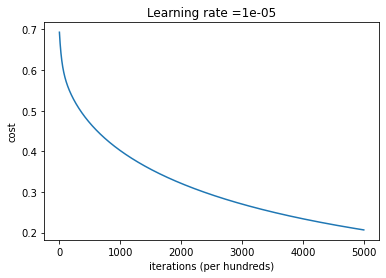

train accuracy: 97.47292418772564 %
test accuracy: 54.83870967741936 %


In [72]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 500000, learning_rate = 0.00001)

## Checking what you classified wrong

Change the index to a number between 0 and 12 to see images that you wrongly classified
The actual label = 1, you predicted that y = 0.0, which is wrong


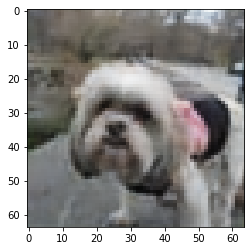

In [73]:
# Example of a picture that was wrongly classified.

num_px = 64

falsePrediction = []

for i in range(0,m_test-1):
    if test_set_y[0,i] != d["Y_prediction_test"][0,i]:
        falsePrediction.append(i)

print("Change the index to a number between 0 and " + str(len(falsePrediction)-1) + " to see images that you wrongly classified" )
index = falsePrediction[0]

plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

print ("The actual label = " + str(test_set_y[0,index]) + ", you predicted that y = " + str(d["Y_prediction_test"][0,index]) + ", which is wrong")



Let's also plot the cost function and the gradients.

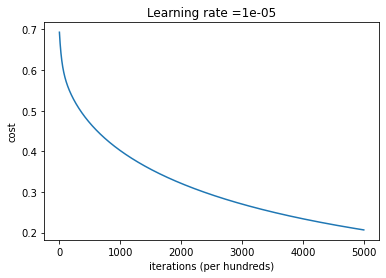

In [74]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## Test with your own image

You can now use your own image and see the output of your model! To do that:
    1. Find a .png or .jpg image that you want to test
    2. Put it in the 'uploadedimages' file that you downloaded
    3. Change the image path below to that image's filename
    
I have already uploaded an image that you can see the algorithm working on. It does classify correctly when the model is trained for 1500 iterations at a learning rate of 0.005

You predicted a 1.0 which means the algorithm thinks the image is of a dog


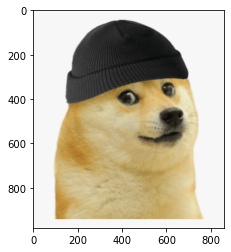

In [79]:

'''CODE BELOW'''

#upload your image to the uploaded images file, and change the directory to the image you want to test on
#make sure the image is a .png or .jpg, others file types may not work.
img_path = 'D:/Downloads/Teens In AI/TeensInAI2020/Dog Logistic Regression/uploadedimages/my_image.png'

'''CODE ABOVE'''

img_not_cropped = keras.preprocessing.image.load_img(img_path)
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0

x_final = x.reshape((1, num_px*num_px*3)).T

#print(x_final.shape)

my_predicted_image = predict(d["w"], d["b"], x_final)

if np.squeeze(my_predicted_image) == 1:
    print("You predicted a " + str(np.squeeze(my_predicted_image)) + " which means the algorithm thinks the image is of a dog")
else:
    print("You predicted a " + str(np.squeeze(my_predicted_image)) + " which means the algorithm thinks the image is not of a dog")
    
plt.imshow(img_not_cropped)

Please do go ahead and message me (Aasmaan) if you want any extra help or have any questions (not necessarily about this).